## Lab 1

1.  Import the necessary libraries.
2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
3. First look at its main features (head, shape, info).
4. Rename the columns so they follow the PE8 (snake case).
5. Change effective to date column to datetime format.
6. Check NaN values per column.
7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
9. Get categorical features.
10. What should we do with the customer_id column?

In [154]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [233]:
# Importing all dedicated libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
#from scipy.stats import shapiro
import scipy.stats as st
from scipy import stats
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split
#from sklearn import linear_model
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error
#import math
#from sklearn.preprocessing import PowerTransformer
#import pickle

In [156]:
# Print whole df if necessary

pd.set_option('display.max_rows', 100)

In [157]:
# Reading files into a DF

df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [158]:
# Checking the df

df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [159]:
df.shape

(9134, 24)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [161]:
# Renaming columns
#df.rename(columns=lambda x: x.replace(' ', '_').lower())

df.columns= df.columns.str.lower().str.replace(' ','_')

In [162]:
df['effective_to_date'].dtype

dtype('O')

In [163]:
# Fixing datetime col

df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

In [164]:
df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [165]:
# Checking nan values

df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [166]:
# Checking duplicated rows

df.duplicated().sum()

0

In [167]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [168]:
# organizing df ... target variable to the last

df= df[['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'total_claim_amount']]

In [169]:
for x in df.columns:
    print( x, '|', 'uniques:', len(df[x].unique()), '|', 'type:', df[x].dtypes)

customer | uniques: 9134 | type: object
state | uniques: 5 | type: object
customer_lifetime_value | uniques: 8041 | type: float64
response | uniques: 2 | type: object
coverage | uniques: 3 | type: object
education | uniques: 5 | type: object
effective_to_date | uniques: 59 | type: datetime64[ns]
employmentstatus | uniques: 5 | type: object
gender | uniques: 2 | type: object
income | uniques: 5694 | type: int64
location_code | uniques: 3 | type: object
marital_status | uniques: 3 | type: object
monthly_premium_auto | uniques: 202 | type: int64
months_since_last_claim | uniques: 36 | type: int64
months_since_policy_inception | uniques: 100 | type: int64
number_of_open_complaints | uniques: 6 | type: int64
number_of_policies | uniques: 9 | type: int64
policy_type | uniques: 3 | type: object
policy | uniques: 9 | type: object
renew_offer_type | uniques: 4 | type: object
sales_channel | uniques: 4 | type: object
vehicle_class | uniques: 6 | type: object
vehicle_size | uniques: 3 | type: obj

In [170]:
numerical_cols = df.select_dtypes(np.number).columns
categorical_cols = df.select_dtypes(np.object).columns
discrete_cols= []
num_cols = []

In [171]:
# Function to return cat/num/dis variables

def num_dis_cat(data, tipo= ['cat', 'dis', 'num']):
        
    if tipo == 'dis':
        for x in numerical_cols:
            if len(data[x].unique()) < 10:
                discrete_cols.append(x)
        return data[discrete_cols]
    
    elif tipo == 'num':
        for x in numerical_cols:
            if len(data[x].unique()) > 10:
                num_cols.append(x)
        return data[num_cols]
        
    else: return data[categorical_cols]

In [172]:
discretes= num_dis_cat(df, 'dis')
numericals= num_dis_cat(df, 'num')
categoricals= num_dis_cat(df, 'cat')

In [173]:
discretes.head()
discretes.shape

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


(9134, 2)

In [174]:
numericals.head()
numericals.shape

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


(9134, 6)

In [175]:
categoricals.head()
categoricals.shape

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


(9134, 15)

In [176]:
# check every single categorical variable

categoricals['customer'].unique()

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

In [177]:
categoricals['state'].value_counts()/len(categoricals['state'])

California    0.344865
Oregon        0.284760
Arizona       0.186446
Nevada        0.096562
Washington    0.087366
Name: state, dtype: float64

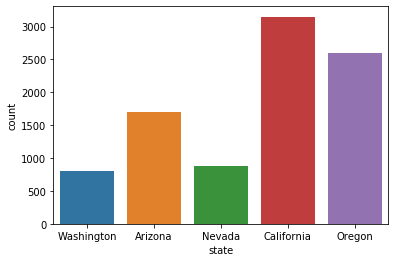

In [178]:
sns.countplot(data= categoricals, x= 'state')

In [179]:
categoricals['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [180]:
# grouping non relevant states

rel_states= ['California', 'Oregon']

def grouping_states(x):
    
    if not x in rel_states:
        x= 'Other'
        return x
    else: return x
    
categoricals['state']= categoricals['state'].apply(grouping_states)

In [181]:
categoricals['state']= categoricals['state'].replace('California state', 'California')

In [182]:
categoricals['state'].value_counts()

Other         3383
California    3150
Oregon        2601
Name: state, dtype: int64

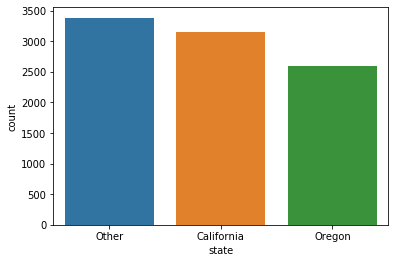

In [183]:
sns.countplot(data= categoricals, x= 'state')

In [184]:
categoricals['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [185]:
categoricals['coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

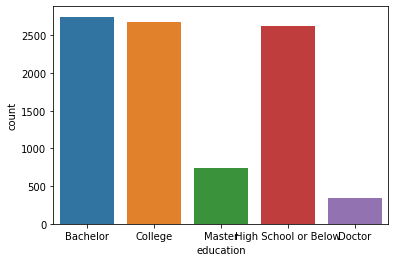

In [186]:
sns.countplot(data= categoricals, x= 'education')

In [187]:
categoricals['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [188]:
# grouping non relevant states

higher_ed= ['Master', 'Doctor']

def grouping_education(x):
    
    if x in higher_ed:
        x= 'Higher Education'
        return x
    else: return x
    
categoricals['education']= categoricals['education'].apply(grouping_education)

In [189]:
categoricals['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [190]:
categoricals['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [238]:
categoricals['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [191]:
categoricals['marital_status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [192]:
categoricals['policy_type'].value_counts()/len(categoricals['policy_type'])

Personal Auto     0.743157
Corporate Auto    0.215459
Special Auto      0.041384
Name: policy_type, dtype: float64

In [193]:
# we can assume this 2 columns are pretty much the same

categoricals['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [194]:
# cleaning policy

def cleaning_pol(x):
    
    if 'Personal' in x:
        x= 'Personal'
        return x

    elif 'Corporate' in x:
        x= 'Corporate'
        return x
        
    else: 
        x= 'Special'
        return x
    
categoricals['policy']= categoricals['policy'].apply(cleaning_pol)

In [195]:
# deleting one of the 2 columns

categoricals.drop(columns= 'policy_type', inplace= True)

In [196]:
categoricals['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [197]:
categoricals['sales_channel']= categoricals['sales_channel'].replace(['Web', 'Call Center'], 'Other')

In [199]:
categoricals['sales_channel'].value_counts()

Agent     3477
Other     3090
Branch    2567
Name: sales_channel, dtype: int64

In [215]:
def cleaning_vecl(x):
    
    if ('SUV' or 'Sport') in x:
        x= 'SUV'
        return x
        
    else: 
        x= 'Standard'
        return x

categoricals['vehicle_class']= categoricals['vehicle_class'].apply(cleaning_vecl)

In [216]:
categoricals['vehicle_class'].value_counts()

Standard    7154
SUV         1980
Name: vehicle_class, dtype: int64

In [149]:
categoricals['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [239]:
categoricals.shape
categoricals.columns

(9134, 14)

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

In [248]:
for x in range(len(categoricals.columns)-1):
    cross = pd.crosstab(categoricals[categoricals.columns[x]], categoricals[categoricals.columns[x+1]], margins = False)
    P = st.chi2_contingency(cross)
    print('P value of ',categoricals.columns[x], 'and', categoricals.columns[x+1] , P[1])

P value of  customer and state 0.4944343563922849
P value of  state and response 0.8721130635472298
P value of  response and coverage 0.969826323902391
P value of  coverage and education 0.03572775633568488
P value of  education and employmentstatus 1.3349034793959516e-24
P value of  employmentstatus and gender 0.00018151136449675047
P value of  gender and location_code 1.130242633932661e-15
P value of  location_code and marital_status 2.787741035216401e-90
P value of  marital_status and policy 0.3943895858663917
P value of  policy and renew_offer_type 0.5653270073225414
P value of  renew_offer_type and sales_channel 1.030527162627122e-46
P value of  sales_channel and vehicle_class 0.5843287131521193
P value of  vehicle_class and vehicle_size 0.0673653216392462


## Lab 2